<a href="https://colab.research.google.com/github/Ahbin-Park/abinushka/blob/Python/Codeit_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4_Topic5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%A7%8C%EB%93%A4%EA%B8%B0(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 웹사이트에서 HTML 코드 받아오기

In [1]:
import requests

In [2]:
page = requests.get("https://www.google.com")
type(page)

requests.models.Response

In [4]:
print(page.text)

<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world's information, including webpages, images, videos and more. Google has many special features to help you find exactly what you're looking for." name="description"><meta content="noodp" name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="8J3D2QxiF9+7vSUmg8VV0A==">(function(){window.google={kEI:'josXYaS1GL6r5NoPytOLyAg',kEXPI:'0,18168,754047,1,530320,54246,2627,954,5105,206,4804,2316,383,246,5,1354,4936,314,1122516,1197747,536,328984,51224,16114,17444,1953,9287,17572,4858,1362,9290,3024,4751,12834,4020,978,13228,3847,4192,6430,1142,13385,235,4283,2779,917,5081,889,704,1279,2212,239,291,149,1103,841,1982,213,4101,108,3406,606,2023,2297,14670,2269,1,957,2845,7,4773,7581,5096,7876,5037,1483,1924,908,2,941,15324,432,3,

### url 해부

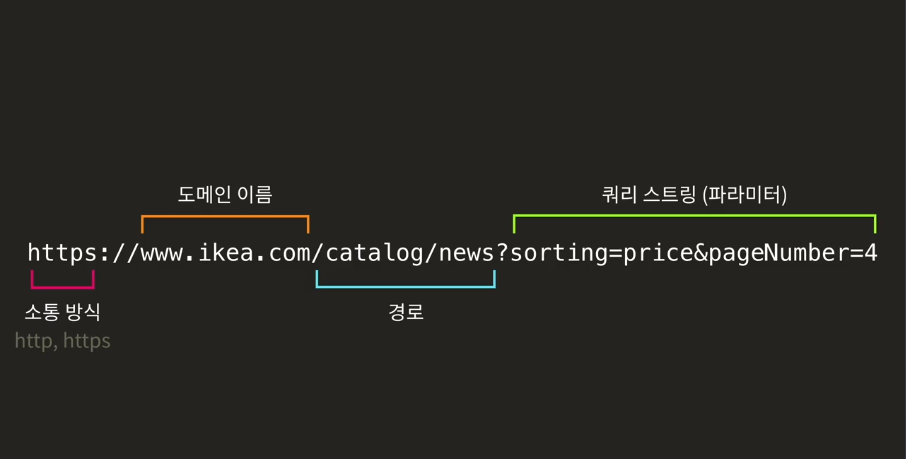

*  경로: catalog/news
*  '?' 뒤는 쿼리스트링
*  (파라미터): 제품을 price 기준으로 가져오기, 페이지는 4

In [ ]:
https://en.wikipedia.org/wiki/Computer_programming#Debugging

*  '#' :다른섹션으로 이동

### 연습문제 (TV 시청률 크롤링)

In [ ]:
#https://workey.codeit.kr/ratings/index?year=2010&month=2&weekIndex=0

In [ ]:
rating_pages = []

years= range(2010,2013)
months = range(1,13)
weeks=range(0,5)

for year in years:
  for month in months:
    for week in weeks:
      url = "https://workey.codeit.kr/ratings/index?year={}&month={}&weekIndex{}".format(year, month, week)
      response = requests.get(url)
      rating_pages.append(response.text)

print(len(rating_pages)) # 가져온 총 페이지 수 
print(rating_pages[0]) # 첫 번째 페이지의 HTML 코드

## HTML 코드에서 데이터 추출하기

### CSS를 사용하면 HTML 태그에 색, 폰트, 크기, 여백 등을 설정 가능


1. **HTML 태그를 선택하는 코드**
```
li {
}
```
 * 스타일 적용의 범위를 정하는 코드를 CSS 선택자(CSS Selector)라고 함

2. **스타일을 지정하는 코드**
```
color: blue;
font-size: 20px;
```
 * 색상을 파란색으로, 글자 크기를 20px로 하라는 의미
 * 기타 코드: https://www.w3schools.com/cssref/

### 첫 번째 CSS 선택자: 태그 이름
```
li {
  color: blue;
  font-size: 20px;
}
```
```
p {
  color: blue;
  font-size: 20px;
}
```



### 두 번째 CSS 선택자: 아이디 (id)
* 단 하나의 태그에만 스타일을 입히고 싶을 때 아이디(id) 속성 사용
```
<li id="coffee">커피</li>
<li id="green-tea">녹차</li>
<li id="milk">우유</li>
```
* 아이디를 CSS 선택자로 활용하면, 그 아이디를 가진 태그에만 스타일 적용됨
```
#green-tea {
  color: blue;
  font-size: 20px;
}
```
**동일한 아이디를 여러 태그가 가질 수 없으며, 하나의 아이디는 HTML 코드 전체에 단 한 번만 나와야 함*


### 세 번째 CSS 선택자: 클래스(class)
* 여러 코드에 동시에 스타일을 입히고 싶을 때, id가 아닌 class 사용
```
<li class="favorite">커피</li>
<li>녹차</li>
<li class="favorite">우유</li>
```
* 클래스 상징 기호 '.' ex) .favorite : 클래스가 favorite인 모든 태그를 선택
```
.favorite {
  color: blue;
  font-size: 20px;
}
```
* 클래스 여러개 가질 수 있음 (클래스 사이에 공백을 추가)
```
<p class="favorite preview">이것은 첫 번째 문단입니다.</p>
```


### 네 번째 CSS 선택자: 속성(attribute)
> 아이디와 클래스 외의 속성도 CSS 선택자로 사용할 수 있음

* alt 속성: 이미지가 로딩되지 않을 경우 대비, 이미지가 어떤 이미지인지 텍스트로 알려주는 역할
```
<img src='https://i.imgur.com/bY0l0PC.jpg' alt="coffee"/>
<img src='https://i.imgur.com/fvJLWdV.jpg' alt="green-tea"/>
<img src='https://i.imgur.com/rNOIbNt.jpg' alt="milk"/>
```

* 속성 이름과 속성 값을 CSS 선택자로 활용 [name="value"]
* "alt 속성의 값이 "green-tea"인 태그의 가로 길이를 300px로 하라"
```
[alt="green-tea"] {
  width: 300px;
}
```

## 파싱(Parsing)
* 문자의 구조를 분석해서 원하는 정보를 얻어냄
* Python에서 Beautiful Soup 툴로 HTML 파싱

### 0. 파싱할 HTML 코드를 변수 html_code에 넣어줌

In [10]:
html_code = """<!DOCTYPE html>
<html>
<head>
    <title>Sample Website</title>
</head>
<body>
<h2>HTML 연습!</h2>

<p>이것은 첫 번째 문단입니다.</p>
<p>이것은 두 번째 문단입니다!</p>

<ul>
    <li>커피</li>
    <li>녹차</li>
    <li>우유</li>
</ul>

<img src='https://i.imgur.com/bY0l0PC.jpg' alt="coffee"/>
<img src='https://i.imgur.com/fvJLWdV.jpg' alt="green-tea"/>
<img src='https://i.imgur.com/rNOIbNt.jpg' alt="milk"/>

</body>
</html>"""

### 1. BeautifulSoup 타입 만들기

In [11]:
from bs4 import BeautifulSoup

In [12]:
## BeautifulSoup 타입으로 변환
soup = BeautifulSoup(html_code, 'html.parser')

# type 출력
print(type(soup))

<class 'bs4.BeautifulSoup'>


### 2. 특정 태그 선택하기
* .select() : CSS 선택자를 넣어 특정 HTML 태그만 선택 가능

In [13]:
#모든 <li>태그 선택
li_tags = soup.select('li')
#결과출력
print(li_tags)

[<li>커피</li>, <li>녹차</li>, <li>우유</li>]


In [17]:
#첫 번째 <li> 태그만 꺼내기
li_tags = soup.select('li')

print(li_tags[0])
print(type(li_tags[0]))

<li>커피</li>
<class 'bs4.element.Tag'>


### 3. 태그에서 문자열 추출하기
* BeautifulSoup 태그 뒤에 .text라고 붙이면, 텍스트만 꺼낼 수 있음

In [18]:
li_tags= soup.select('li')
print(li_tags[0])
print(li_tags[0].text)

<li>커피</li>
커피


In [19]:
#반복문 사용하여 모든 문자열 추출
beverage_names = []
for li in li_tags:
  beverage_names.append(li.text)

print(beverage_names)

['커피', '녹차', '우유']


## 태그 속성값 추출하기
* 태그에 ["속성 이름"]을 붙여주면 해당 속성의 값을 가져올 수 있음

In [20]:
from bs4 import BeautifulSoup

html_code = """<!DOCTYPE html>
<html>
<head>
    <title>Sample Website</title>
</head>
<body>
<h2>HTML 연습!</h2>

<p>이것은 첫 번째 문단입니다.</p>
<p>이것은 두 번째 문단입니다!</p>

<ul>
    <li>커피</li>
    <li>녹차</li>
    <li>우유</li>
</ul>

<img src='https://i.imgur.com/bY0l0PC.jpg' alt="coffee"/>
<img src='https://i.imgur.com/fvJLWdV.jpg' alt="green-tea"/>
<img src='https://i.imgur.com/rNOIbNt.jpg' alt="milk"/>

</body>
</html>"""

In [21]:
# BeautifulSoup 타입으로 변환
soup = BeautifulSoup(html_code, 'html.parser')

# 모든 <img> 태그 선택하기
img_tags = soup.select('img')

# 결과 출력
print(img_tags)

[<img alt="coffee" src="https://i.imgur.com/bY0l0PC.jpg"/>, <img alt="green-tea" src="https://i.imgur.com/fvJLWdV.jpg"/>, <img alt="milk" src="https://i.imgur.com/rNOIbNt.jpg"/>]


In [23]:
print(img_tags[0])
print(img_tags[0]["src"])

<img alt="coffee" src="https://i.imgur.com/bY0l0PC.jpg"/>
https://i.imgur.com/bY0l0PC.jpg


In [24]:
img_tags = soup.select('img')
img_srcs = []

for img in img_tags:
  img_srcs.append(img["src"])

print(img_srcs)

['https://i.imgur.com/bY0l0PC.jpg', 'https://i.imgur.com/fvJLWdV.jpg', 'https://i.imgur.com/rNOIbNt.jpg']


### OR 연산 : ,



```
<p class="one">paragraph 1</p>
<p class="two">paragraph 2</p>
<p class="three">paragraph 3</p>
<p class="four">paragraph 4</p>
<p class="five">paragraph 5</p>
```

* two, four 클래스 해당 선택
```
.two, .four {
  color: red;
}
```



### AND 연산 : 붙여쓰기


```
<p class="favorite">paragraph 1</p>
<p class="favorite">paragraph 2</p>
<p class="favorite private">paragraph 3</p>
<p class="private">paragraph 4</p>
<p class="private">paragraph 5</p>
```

* "favorite" 클래스와 "private" 클래스를 모두 가진 태그를 선택
```
.favorite.private {
  color: red;
}
```




### 이탤릭 효과 (i)
* p 태그 안에 중첩된 i 태그만 빨간색으로 지정하라
```
p i {
  color: red;
}
```




## CSS Selectors Cheatsheet
https://gist.github.com/magicznyleszek/809a69dd05e1d5f12d01